In [9]:
#Data Pre-Processing

In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


In [12]:
#split 'Start-Time attribute into Year,month,weekday,day,hours and minutes'
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,5,46,2016,2,0,8
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,6,7,2016,2,0,8
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Night,Day,Day,6,49,2016,2,0,8
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Night,Day,Day,Day,7,23,2016,2,0,8
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,Day,7,39,2016,2,0,8


In [13]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Minute', 'Year', 'Month', 'Weekday',
       'Day'],
      dtype='object')

In [14]:
#After Exploratory Data Analysis we found that there are few feature that can be dropped based on least significance and redundant atrributes , so that model can be trained on cleaned dataset.
least_Significant_features_to_drop = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", 
                                      "Description", "Number", "Street", "County", "State", "Zipcode", "Country", 
                                      "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop"
                                      , "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
#newSet = df.drop(least_Significant_features_to_drop, axis=1)
df = df.drop(least_Significant_features_to_drop, axis=1)
#newSet.head()
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,L,Reynoldsburg,37.9,100.0,29.65,10.0,...,False,False,False,Night,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,R,Williamsburg,36.0,100.0,29.67,10.0,...,False,False,True,Night,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,R,Dayton,35.1,96.0,29.64,9.0,...,False,False,False,Day,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,R,Dayton,36.0,89.0,29.65,6.0,...,False,False,True,Day,7,39,2016,2,0,8


In [15]:
#Now we will check if data has some duplicates value and remove them from the dataset
print("Total Number of rows:", len(df.index))
#newSet.drop_duplicates(inplace=True)
df.drop_duplicates
print("Total number of rows after removing duplicates:", len(df.index))

Total Number of rows: 4232541
Total number of rows after removing duplicates: 4232541


In [16]:
#Handling incorrect and missing values

In [17]:
#initially looking at the Side column
df["Side"].value_counts()

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [18]:
#the output shows 1 record without Side so that can be dropped
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    3467079
L     765461
Name: Side, dtype: int64

In [19]:
#next looking at visibility and pressure
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4133872.00,4156156.00
mean,9.11,29.69
std,2.82,0.86
min,0.00,0.00
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [20]:
#the output shows min as 0 which informs us that a number of records are missing them and have been replaced with 0
#we are dropping the records with missing values for visibility and pressure

df = df[df["Visibility(mi)"] != 0]
df = df[df["Pressure(in)"] != 0]
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4131229.00,4153515.00
mean,9.12,29.69
std,2.81,0.86
min,0.06,0.02
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [21]:
#analyzing the weather conditions
#outputting the total number of different conditions and their names

weather_conditions = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(weather_conditions), "\n")
print(weather_conditions)

Total number of weather conditions:  132 

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' '

In [22]:
#reducing the amount of weather conditions by substituting them with a more common name

df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

common_weather = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(common_weather), "\n")
print(common_weather)

Total number of weather conditions:  12 

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Sand' 'Windy' 'Hail'
 'Thunderstorm' 'Tornado']


In [23]:
#after checking the weather conditions, we are analyzing the wind directions
#outputting the total number of different directions and their names

wind_directions = df["Wind_Direction"].unique()
print("Total number of wind directions: ", len(wind_directions), "\n")
print(wind_directions)

Total number of wind directions:  25 

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [24]:
#similarly to weather conditions, we reduce the amount of wind directions by grouping the values

df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df["Wind_Direction"] = df["Wind_Direction"].map(lambda i : i if len(i) != 3 else i[1:], na_action="ignore")
common_direction = df["Wind_Direction"].unique()

print("Total number of wind directions: ", len(common_direction), "\n")
print(common_direction)

Total number of wind directions:  11 

['Calm' 'SW' 'NW' 'W' 'NE' 'S' 'N' 'Variable' 'SE' 'E' nan]


In [25]:
#analyzing the missing values
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Side                       0
City                     137
Temperature(F)         89873
Humidity(%)            95422
Pressure(in)           76381
Visibility(mi)         98667
Wind_Direction         83601
Wind_Speed(mph)       479284
Precipitation(in)    2065296
Weather_Condition      99024
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Civil_Twilight           141
Hour                       0
Minute                     0
Year                       0
Month                      0
Weekday                    0
Day                        0
dtype: int64

In [26]:
#from the output, we identified that many of the records don't contain informations about Precipitation so we will drop that feature
#we fill in the missing features with the mean for numerical features 
#we delete the records with missing informations for categorical features
fill_features = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[fill_features] = df[fill_features].fillna(df[fill_features].mean())
df.dropna(inplace=True)
df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Hour                 0
Minute               0
Year                 0
Month                0
Weekday              0
Day                  0
dtype: int64

In [27]:
#verifying the variance for the features

In [28]:
#verifying the variances to see if we need to eliminate features with a low value

df.describe().round(2)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour,Minute,Year,Month,Weekday,Day
count,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00
mean,2.30,36.38,-95.48,0.33,61.51,65.68,29.69,9.12,7.90,0.01,12.14,29.97,2018.45,7.19,2.46,15.91
std,0.53,4.98,17.33,1.59,18.47,22.66,0.86,2.81,5.08,0.11,5.47,17.29,1.33,3.56,1.75,8.70
min,1.00,24.56,-124.62,0.00,-89.00,1.00,0.02,0.06,0.00,0.00,0.00,0.00,2016.00,1.00,0.00,1.00
25%,2.00,33.51,-117.36,0.00,49.30,49.00,29.64,10.00,5.00,0.00,8.00,15.00,2017.00,4.00,1.00,9.00
50%,2.00,35.80,-90.00,0.00,63.00,68.00,29.93,10.00,7.91,0.01,12.00,30.00,2019.00,8.00,2.00,16.00
75%,3.00,40.20,-80.87,0.08,75.00,85.00,30.08,10.00,10.00,0.01,17.00,45.00,2020.00,10.00,4.00,23.00
max,4.00,49.00,-67.11,441.75,189.00,100.00,58.04,140.00,984.00,25.00,23.00,59.00,2020.00,12.00,6.00,31.00


In [29]:
#Encode target labels with value between 0 and n_classes-1
encoder = preprocessing.LabelEncoder()
df['Bump'] = encoder.fit_transform(df['Bump'])
df['Amenity'] = encoder.fit_transform(df['Amenity'])
df['Crossing'] = encoder.fit_transform(df['Crossing'])
df['Give_Way'] = encoder.fit_transform(df['Give_Way'])
df['Junction'] = encoder.fit_transform(df['Junction'])
df['No_Exit'] = encoder.fit_transform(df['No_Exit'])
df['Railway'] = encoder.fit_transform(df['Railway'])
df['Roundabout'] = encoder.fit_transform(df['Roundabout'])
df['Station'] = encoder.fit_transform(df['Station'])
df['Stop'] = encoder.fit_transform(df['Stop'])
df['Traffic_Calming'] = encoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal'] = encoder.fit_transform(df['Traffic_Signal'])
df['City'] = encoder.fit_transform(df['City'])

In [30]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,R,2577,36.9,91.0,29.68,10.0,...,0,0,0,Night,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,L,8978,37.9,100.0,29.65,10.0,...,0,0,0,Night,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,R,11741,36.0,100.0,29.67,10.0,...,0,0,1,Night,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,R,2577,35.1,96.0,29.64,9.0,...,0,0,0,Day,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,R,2577,36.0,89.0,29.65,6.0,...,0,0,1,Day,7,39,2016,2,0,8


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


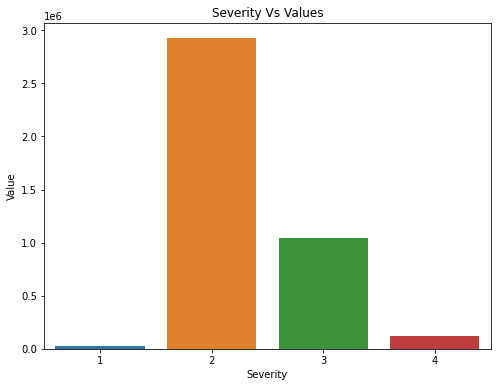

In [31]:
severityCount = df['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [32]:
#Data distribution is not uniform, Severity 2 has more no. of rows whereas Severity 1 has lesser no. of rows.
#So,we take only 28718 records for all Severity ranges

In [33]:
print('No. of rows in Severity 1')
print(len(df[df["Severity"]==1].index))

No. of rows in Severity 1
28718


In [26]:
size = len(df[df["Severity"]==1].index)
X = pd.DataFrame()
#We are taking 28718 sample points from each Severity
for i in range(1,5):
    S = df[df['Severity']==i]
    temp = S.sample(size, random_state=35)
    X = X.append(temp)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


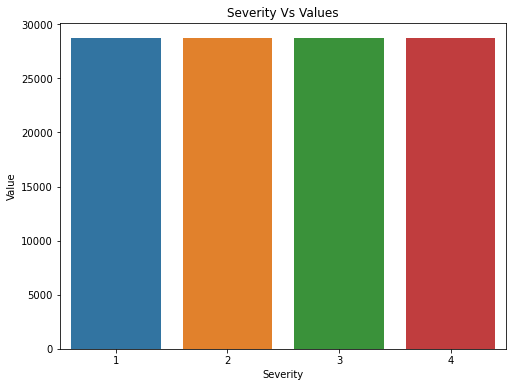

In [27]:
severityCount = X['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [34]:
X=df#(Use this line only if we are not reducing size of dataframe)
X.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day'],
      dtype='object')

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresForScaling = ['Start_Lat', 'Start_Lng','Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)','Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day']
X[featuresForScaling] = scaler.fit_transform(X[featuresForScaling])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,0.626249,0.705349,0.000023,R,2577,0.452878,0.909091,0.511203,0.071030,...,0,0,0,Night,0.217391,0.779661,0.0,0.090909,0.0,0.233333
1,2,0.628823,0.726694,0.000023,L,8978,0.456475,1.000000,0.510686,0.071030,...,0,0,0,Night,0.260870,0.118644,0.0,0.090909,0.0,0.233333
2,2,0.593444,0.705803,0.000023,R,11741,0.449640,1.000000,0.511031,0.071030,...,0,0,1,Night,0.260870,0.830508,0.0,0.090909,0.0,0.233333
3,3,0.621447,0.702796,0.000023,R,2577,0.446403,0.959596,0.510514,0.063885,...,0,0,0,Day,0.304348,0.389831,0.0,0.090909,0.0,0.233333
4,2,0.616540,0.703095,0.000023,R,2577,0.449640,0.888889,0.510686,0.042447,...,0,0,1,Day,0.304348,0.661017,0.0,0.090909,0.0,0.233333


In [36]:
categoryFeatures = set(["Side","Weather_Condition", "Wind_Direction", "Civil_Twilight"])

for cat in categoryFeatures:
    X[cat] = X[cat].astype("category")

for cat in categoryFeatures:
    size = len(X[cat].unique())
    print("Category: "+cat+"  Count:" +str(size))
    

Category: Side  Count:2
Category: Civil_Twilight  Count:2
Category: Weather_Condition  Count:11
Category: Wind_Direction  Count:10


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116856 entries, 0 to 4232540
Data columns (total 33 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Severity           int64   
 1   Start_Lat          float64 
 2   Start_Lng          float64 
 3   Distance(mi)       float64 
 4   Side               category
 5   City               int64   
 6   Temperature(F)     float64 
 7   Humidity(%)        float64 
 8   Pressure(in)       float64 
 9   Visibility(mi)     float64 
 10  Wind_Direction     category
 11  Wind_Speed(mph)    float64 
 12  Precipitation(in)  float64 
 13  Weather_Condition  category
 14  Amenity            int64   
 15  Bump               int64   
 16  Crossing           int64   
 17  Give_Way           int64   
 18  Junction           int64   
 19  No_Exit            int64   
 20  Railway            int64   
 21  Roundabout         int64   
 22  Station            int64   
 23  Stop               int64   
 24  Traffic_Calming    int64

In [38]:
X = pd.get_dummies(X, columns=categoryFeatures, drop_first=True)
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W
0,3,0.626249,0.705349,0.000023,2577,0.452878,0.909091,0.511203,0.071030,0.008035,...,0,0,0,0,0,0,0,0,0,0
1,2,0.628823,0.726694,0.000023,8978,0.456475,1.000000,0.510686,0.071030,0.008035,...,0,0,0,0,0,0,0,0,0,0
2,2,0.593444,0.705803,0.000023,11741,0.449640,1.000000,0.511031,0.071030,0.003557,...,0,0,0,0,0,0,0,1,0,0
3,3,0.621447,0.702796,0.000023,2577,0.446403,0.959596,0.510514,0.063885,0.004675,...,0,0,0,0,0,0,0,1,0,0
4,2,0.616540,0.703095,0.000023,2577,0.449640,0.888889,0.510686,0.042447,0.003557,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df['Side'] = encoder.fit_transform(df['Side'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116856 entries, 0 to 4232540
Data columns (total 50 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Severity                        int64  
 1   Start_Lat                       float64
 2   Start_Lng                       float64
 3   Distance(mi)                    float64
 4   City                            int64  
 5   Temperature(F)                  float64
 6   Humidity(%)                     float64
 7   Pressure(in)                    float64
 8   Visibility(mi)                  float64
 9   Wind_Speed(mph)                 float64
 10  Precipitation(in)               float64
 11  Amenity                         int64  
 12  Bump                            int64  
 13  Crossing                        int64  
 14  Give_Way                        int64  
 15  Junction                        int64  
 16  No_Exit                         int64  
 17  Railway                    

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Decision Tree
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

(3087642, 49) (3087642,)
(1029214, 49) (1029214,)
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:  3.5min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  5.6min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:  6.6min remaining:   44.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.3min finished


Best parameters scores:
{'criterion': 'entropy', 'max_depth': 30}
Train score: 0.9632794216427941
Validation score: 0.8310331962060369
Default scores:
Train score: 0.9990306518696144
Validation score: 0.8236741824343625


In [76]:
#Reducing no. of records to size of severity1
#Train score: 0.7654897044826706
#Validation score: 0.7447245629918517
#Default scores:
#Train score: 0.9999071430229589
#Validation score: 0.6945121526568703

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116856 entries, 0 to 4232540
Data columns (total 50 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Severity                        int64  
 1   Start_Lat                       float64
 2   Start_Lng                       float64
 3   Distance(mi)                    float64
 4   City                            int64  
 5   Temperature(F)                  float64
 6   Humidity(%)                     float64
 7   Pressure(in)                    float64
 8   Visibility(mi)                  float64
 9   Wind_Speed(mph)                 float64
 10  Precipitation(in)               float64
 11  Amenity                         int64  
 12  Bump                            int64  
 13  Crossing                        int64  
 14  Give_Way                        int64  
 15  Junction                        int64  
 16  No_Exit                         int64  
 17  Railway                    

,0
0,0.596940
1,1.436738
2,-0.185273
3,1.561845
4,-0.197550


Accuracy: 0.30625036271835643


ModuleNotFoundError: No module named 'graphviz'